# Classification of Odd and Even Numbers: A Study in Linear Separability
this experiment aims to use the perceptron algorithm to classify numbers into 2 classes. odd and even. We will not be using any 3rd party packages that come with the perceptron model or any ML functions as this project is used to deepen the understanding of the basics

perceptron in essence is one of the rudimentary algorithms in ML and is mainly used to classify binary classes from a linearly separable dataset.
## Importing libraries
- numpy for mathematical operations
- matplotlib to visualize data

In [45]:
# for mathematical operations
import numpy as np
# for plotting graphs
import matplotlib

## Generating the dataset
before jumping into ascii lets look at normal representation

In [46]:
x = []
y = []
for i in range(100):
  x.append(i)
  y.append(1 if i % 2 == 0 else 0)
x = np.array(x).reshape(-1, 1)  # Reshape to a 2D array
y = np.array(y).reshape(-1, 1)  # Reshape to a 2D array

print(x.shape)
print(y.shape)
for X,Y in zip(x,y):
  print(f"Input: {X[0]}, Output: {Y}")

(100, 1)
(100, 1)
Input: 0, Output: [1]
Input: 1, Output: [0]
Input: 2, Output: [1]
Input: 3, Output: [0]
Input: 4, Output: [1]
Input: 5, Output: [0]
Input: 6, Output: [1]
Input: 7, Output: [0]
Input: 8, Output: [1]
Input: 9, Output: [0]
Input: 10, Output: [1]
Input: 11, Output: [0]
Input: 12, Output: [1]
Input: 13, Output: [0]
Input: 14, Output: [1]
Input: 15, Output: [0]
Input: 16, Output: [1]
Input: 17, Output: [0]
Input: 18, Output: [1]
Input: 19, Output: [0]
Input: 20, Output: [1]
Input: 21, Output: [0]
Input: 22, Output: [1]
Input: 23, Output: [0]
Input: 24, Output: [1]
Input: 25, Output: [0]
Input: 26, Output: [1]
Input: 27, Output: [0]
Input: 28, Output: [1]
Input: 29, Output: [0]
Input: 30, Output: [1]
Input: 31, Output: [0]
Input: 32, Output: [1]
Input: 33, Output: [0]
Input: 34, Output: [1]
Input: 35, Output: [0]
Input: 36, Output: [1]
Input: 37, Output: [0]
Input: 38, Output: [1]
Input: 39, Output: [0]
Input: 40, Output: [1]
Input: 41, Output: [0]
Input: 42, Output: [1]
Inp

## Visualizing the dataset
we plot the even numbers as red and the odd numbers as blue

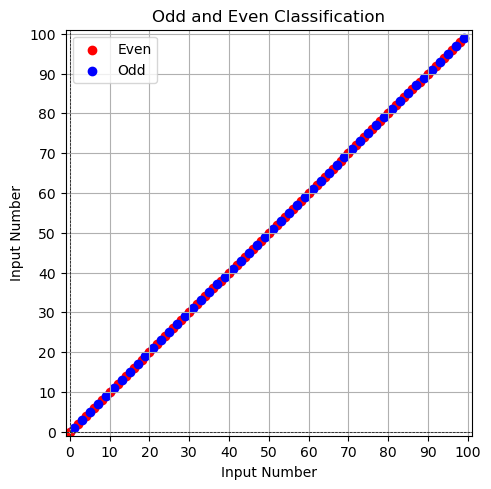

In [47]:
# plot the data with even as red and blue as odd
import matplotlib.pyplot as plt
plt.scatter(x=x[y==1],y=x[y==1], color='red')
plt.scatter(x=x[y==0],y=x[y==0], color='blue')
# add legends
plt.legend(['Even', 'Odd'])
plt.title('Odd and Even Classification')
plt.ylabel('Input Number')
plt.grid(True)
plt.xlim(-1, 101)
plt.ylim(-1, 101)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.xticks(np.arange(0, 101, 10))
plt.yticks(np.arange(0, 101, 10))
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
# show the plot
plt.title('Odd and Even Classification')
plt.xlabel('Input Number')
plt.ylabel('Input Number')
plt.show()

as you can see the **numbers are not linearly separable**.
this means that the perceptron is unable to handle this solution, not unless a multi layer network or a workaround is implemented. This is because the perceptron can only learn a threshold. ie for example if the threshold it identifies is 50 then any number before 50 will be classified as even and the rest as odd.

***still for research sake we can implement a basic perceptron and see how it performs***

## Simple perceptron
### Defining Perceptron model
- W indicates the weight of the specific perceptron
- step function used to get the prediction
- fit to train the perceptron with the given dataset.
- predict as a wrapper layer incase bias is to be added.\

this is a simple definition

In [48]:
class Perceptron:
    def __init__(self, N, alpha=0.1):
        self.W = np.random.randn(N+1) / np.sqrt(N)
        self.alpha = alpha
    
    def step(self, x):
        # Proper step function using threshold, not modulo
        return 1 if x > 0 else 0
    
    def fit(self, X, Y, epochs=1000):
        # Add bias column
        X = np.c_[X, np.ones(X.shape[0])]
        for epoch in range(epochs):
            for (x, y) in zip(X, Y):
                pred = self.step(np.dot(x, self.W))
                if pred != y:
                    self.W += self.alpha * (y - pred) * x
    
    def predict(self, X, addBias=True):
        if addBias:
            X = np.c_[X, np.ones(X.shape[0])]
        return self.step(np.dot(X, self.W))

### Training the perceptron

In [49]:
p = Perceptron(1, alpha=0.1)
p.fit(x, y, epochs=1000)

### Testing the perceptron

In [50]:
total=correct= 0
for X,Y in zip(x,y):
  pred = p.predict(X=X.reshape(1, -1))  # Predict single sample
  print(f"Input: {X[0]}, Predicted Output: {'even' if pred == 1 else 'odd'}")
  total += 1
  if pred == Y:
    print("CORRECT")
    correct += 1
print(f"Accuracy: {correct/total * 100:.2f}%")
print(f'Learned Weights: {p.W}')
print(f'Threshold appears to be around {-p.W[1]/p.W[0] if p.W[0] != 0 else 'undefined'}')

Input: 0, Predicted Output: even
CORRECT
Input: 1, Predicted Output: even
Input: 2, Predicted Output: even
CORRECT
Input: 3, Predicted Output: even
Input: 4, Predicted Output: even
CORRECT
Input: 5, Predicted Output: even
Input: 6, Predicted Output: even
CORRECT
Input: 7, Predicted Output: even
Input: 8, Predicted Output: even
CORRECT
Input: 9, Predicted Output: even
Input: 10, Predicted Output: even
CORRECT
Input: 11, Predicted Output: odd
CORRECT
Input: 12, Predicted Output: odd
Input: 13, Predicted Output: odd
CORRECT
Input: 14, Predicted Output: odd
Input: 15, Predicted Output: odd
CORRECT
Input: 16, Predicted Output: odd
Input: 17, Predicted Output: odd
CORRECT
Input: 18, Predicted Output: odd
Input: 19, Predicted Output: odd
CORRECT
Input: 20, Predicted Output: odd
Input: 21, Predicted Output: odd
CORRECT
Input: 22, Predicted Output: odd
Input: 23, Predicted Output: odd
CORRECT
Input: 24, Predicted Output: odd
Input: 25, Predicted Output: odd
CORRECT
Input: 26, Predicted Output: 

as you can see anything before 9 is even and the rest are odd. so the threshold this particular perceptron has found is >= 10.

## Remedy
Now there are various things we could attempt to try and solve the problem. One would think that this is due to a lack of input features since we only input the numbers and gave the corresponding label. Which is a fair argument because the perceptron has nothing else to work on other than the raw number.

so lets brainstorm some possible paths:
### Last digit parity
since the last digit is the one that will decide if the number is odd or even, we can preprocess the input. This possibly, will make the task simple enough that a single perceptron will be able to solve it. But this defeats the purpose of experiment because the input would be a 10 length vector and not ASCII as the last digit needs to be one hot encoded

### RNN or FNN
Usage of a multi layer network might allow the network to solve linearly inseparable data. more features might have to be engineered. This might be the best suited because of the ASCII restriction

# Last Digit Parity SLP - vector input

Let us make this for curiosity sake

## Generating dataset
we will take the numbers 0-9 and then one hot encode it to make them linearly separable.

In [51]:
# One-hot encode last digit
def encode_last_digit(n):
    last_digit = int(str(n)[-1])
    one_hot = np.zeros(10)
    one_hot[last_digit] = 1
    return one_hot

# Build dataset
x = np.array([encode_last_digit(n) for n in range(10)])
y = np.array([n % 2 for n in range(10)])  # 1 if odd, 0 if even

## Visualize the dataset

One-hot encoded data:
X shape: (10, 10)
y shape: (10,)

First few samples:
Digit 0: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> Odd
Digit 1: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] -> Even
Digit 2: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] -> Odd
Digit 3: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] -> Even
Digit 4: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] -> Odd
Digit 5: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] -> Even
Digit 6: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] -> Odd
Digit 7: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] -> Even
Digit 8: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] -> Odd
Digit 9: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> Even


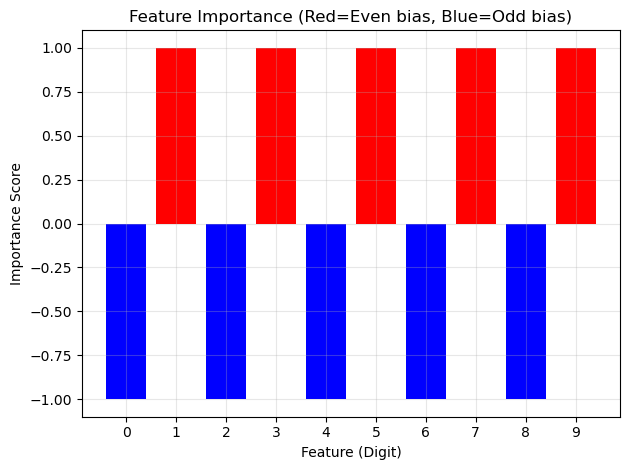

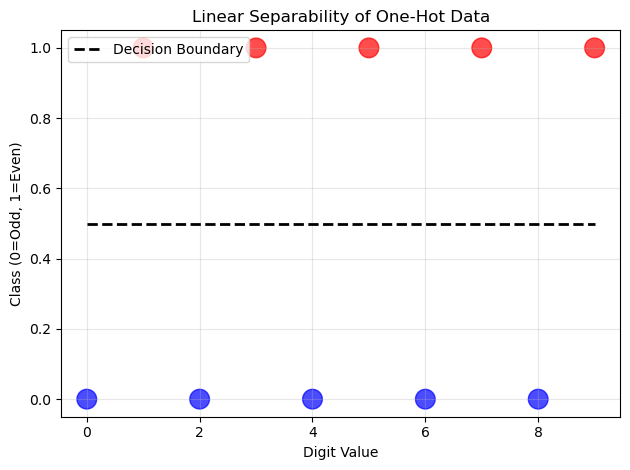

In [52]:
import matplotlib.pyplot as plt

# Print the data first to understand it
print("One-hot encoded data:")
print("X shape:", x.shape)
print("y shape:", y.shape)
print("\nFirst few samples:")
for i in range(10):
    print(f"Digit {i}: {x[i]} -> {'Even' if y[i] == 1 else 'Odd'}")

feature_importance = np.sum(x[y == 1], axis=0) - np.sum(x[y == 0], axis=0)
plt.bar(range(10), feature_importance, color=['red' if imp > 0 else 'blue' for imp in feature_importance])
plt.title('Feature Importance (Red=Even bias, Blue=Odd bias)')
plt.xlabel('Feature (Digit)')
plt.ylabel('Importance Score')
plt.xticks(range(10))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

x_coords = np.arange(10)
y_coords = y
colors = ['red' if label == 1 else 'blue' for label in y]
plt.scatter(x_coords, y_coords, c=colors, s=200, alpha=0.7)
plt.plot([0, 9], [0.5, 0.5], 'k--', linewidth=2, label='Decision Boundary')
plt.title('Linear Separability of One-Hot Data')
plt.xlabel('Digit Value')
plt.ylabel('Class (0=Odd, 1=Even)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

as you can see, now our data is linearly separable.

## Training

In [53]:
p = Perceptron(x.shape[-1])
p.fit(x,y,10)

## Testing

In [54]:
correct = 0
for i in range(100):
  pred = p.predict(encode_last_digit(i).reshape(1,-1))
  print(f'{i} is {"odd" if pred == 1 else 'even'}')
  if i % 2 == pred:
    correct += 1

print(f'accuracy: {correct/100}')

0 is even
1 is odd
2 is even
3 is odd
4 is even
5 is odd
6 is even
7 is odd
8 is even
9 is odd
10 is even
11 is odd
12 is even
13 is odd
14 is even
15 is odd
16 is even
17 is odd
18 is even
19 is odd
20 is even
21 is odd
22 is even
23 is odd
24 is even
25 is odd
26 is even
27 is odd
28 is even
29 is odd
30 is even
31 is odd
32 is even
33 is odd
34 is even
35 is odd
36 is even
37 is odd
38 is even
39 is odd
40 is even
41 is odd
42 is even
43 is odd
44 is even
45 is odd
46 is even
47 is odd
48 is even
49 is odd
50 is even
51 is odd
52 is even
53 is odd
54 is even
55 is odd
56 is even
57 is odd
58 is even
59 is odd
60 is even
61 is odd
62 is even
63 is odd
64 is even
65 is odd
66 is even
67 is odd
68 is even
69 is odd
70 is even
71 is odd
72 is even
73 is odd
74 is even
75 is odd
76 is even
77 is odd
78 is even
79 is odd
80 is even
81 is odd
82 is even
83 is odd
84 is even
85 is odd
86 is even
87 is odd
88 is even
89 is odd
90 is even
91 is odd
92 is even
93 is odd
94 is even
95 is odd
96

# MLP

In [55]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self.softmax(self.final_input)
        return self.final_output
    
    def backward(self, X, y, output, learning_rate):
        output_error = output - y
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * self.hidden_output * (1 - self.hidden_output)
        
        self.weights_hidden_output -= learning_rate * np.dot(self.hidden_output.T, output_error)
        self.bias_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
        self.weights_input_hidden -= learning_rate * np.dot(X.T, hidden_error)
        self.bias_hidden -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)
    
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)
            if (epoch+1) % 100 == 0:
                loss = -np.sum(y * np.log(output)) / X.shape[0]
                print(f'Epoch {epoch+1}, Loss: {loss:.4f}')
    
    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

## Generating Training Data

In [56]:
# Generating Training Data - ascii version
X = []
y = []
for i in range(100):
    ascii_num = ord(str(i)[-1])  # Get ASCII of last digit
    X.append([ascii_num])  # Use ASCII value as input
    if i % 2 == 0:
        y.append(1)  # Even
    else:
        y.append(0)
X = np.array(X)
y = np.array(y).reshape(-1, 1)  # Reshape to 2D array


## Visualize The Dataset

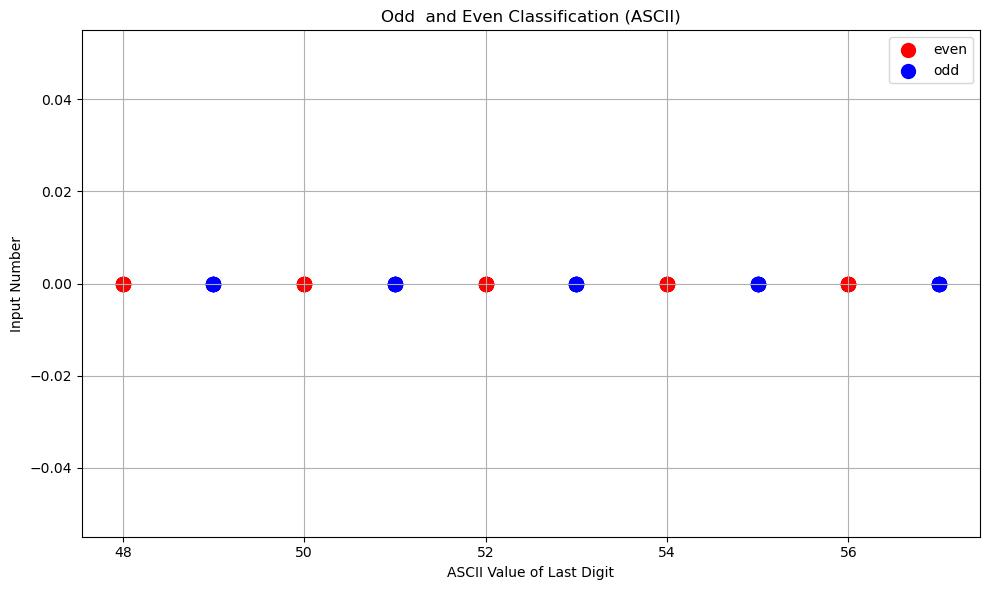

In [57]:
# visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[y[:, 0] == 1], np.zeros_like(X[y[:, 0] == 1]), color='red', label='even', s=100)
plt.scatter(X[y[:, 0] == 0], np.zeros_like(X[y[:, 0] == 0]), color='blue', label='odd', s=100)
plt.title('Odd  and Even Classification (ASCII)')
plt.xlabel('ASCII Value of Last Digit')
plt.ylabel('Input Number')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

as you can see, as we saw with the raw numbers the situation with the ascii numbers is not any different. They are not linearly separable and does not hold enough features for the MLP to learn enough to distinguish them properly. This does not mean MLP is incapable of odd or even classification it just means that a pure ascii input will not be enough. as we showed earlier a hot encoded input was enough even for a simple perceptron to distinguish between odd or even let alone an MLP.

still for curiosity sake lets train and test this.

## Testing

In [58]:
# Test the MLP - Last Digit Version
mlp = MLP(input_size=1, hidden_size=4, output_size=2)  # Smaller hidden layer since it's a simple pattern
mlp.train(X, y, epochs=500, learning_rate=0.1)

# Test predictions
correct = 0
print("\nTesting predictions:")
for i in range(20):  # Test first 20 numbers
    last_digit = int(str(i)[-1])
    inp = np.array([[last_digit]])
    pred = mlp.predict(inp)[0]
    actual = 0 if i % 2 == 0 else 1  # 0=even, 1=odd
    
    print(f"Number {i}: Last Digit={last_digit}, Predicted={'Even' if pred==0 else 'Odd'}, Actual={'Even' if actual==0 else 'Odd'}")
    if pred == actual:
        correct += 1

print(f"\nAccuracy: {correct/20:.2%}")

# Test on some larger numbers to verify it generalizes
print("\nTesting on larger numbers:")
test_numbers = [127, 256, 999, 1024, 5432]
for num in test_numbers:
    last_digit = int(str(num)[-1])
    inp = np.array([[last_digit]])
    pred = mlp.predict(inp)[0]
    actual = 0 if num % 2 == 0 else 1
    
    print(f"Number {num}: Last Digit={last_digit}, Predicted={'Even' if pred==0 else 'Odd'}, Actual={'Even' if actual==0 else 'Odd'}")

Epoch 100, Loss: 2.4713
Epoch 200, Loss: 2.4713
Epoch 300, Loss: 2.4713
Epoch 400, Loss: 2.4713
Epoch 500, Loss: 2.4713

Testing predictions:
Number 0: Last Digit=0, Predicted=Even, Actual=Even
Number 1: Last Digit=1, Predicted=Even, Actual=Odd
Number 2: Last Digit=2, Predicted=Even, Actual=Even
Number 3: Last Digit=3, Predicted=Even, Actual=Odd
Number 4: Last Digit=4, Predicted=Even, Actual=Even
Number 5: Last Digit=5, Predicted=Even, Actual=Odd
Number 6: Last Digit=6, Predicted=Even, Actual=Even
Number 7: Last Digit=7, Predicted=Even, Actual=Odd
Number 8: Last Digit=8, Predicted=Even, Actual=Even
Number 9: Last Digit=9, Predicted=Even, Actual=Odd
Number 10: Last Digit=0, Predicted=Even, Actual=Even
Number 11: Last Digit=1, Predicted=Even, Actual=Odd
Number 12: Last Digit=2, Predicted=Even, Actual=Even
Number 13: Last Digit=3, Predicted=Even, Actual=Odd
Number 14: Last Digit=4, Predicted=Even, Actual=Even
Number 15: Last Digit=5, Predicted=Even, Actual=Odd
Number 16: Last Digit=6, Pre

as you can see the MLP is not able to identify them at all. reaching the max accuracy at 50% which is the limit of this linearly inseparable input.

lets try with one hot encoded inputs.

## MLP with one hot encode input

In [61]:
# Show that even MLPs can work with proper features
X_onehot = np.array([encode_last_digit(i) for i in range(100)])
y_onehot = np.array([[1,0] if i%2==0 else [0,1] for i in range(100)])

mlp_onehot = MLP(input_size=10, hidden_size=4, output_size=2)
mlp_onehot.train(X_onehot, y_onehot, epochs=200, learning_rate=0.1)

# Test the MLP with one-hot encoded inputs
print("Testing MLP with One-Hot Encoded Features:")
print("=" * 50)

# Test on individual digits first
correct = 0
total = 10
print("\nTesting on individual digits (0-9):")
for i in range(10):
    inp = encode_last_digit(i).reshape(1, -1)
    pred = mlp_onehot.predict(inp)[0]
    actual = 0 if i % 2 == 0 else 1  # 0=even, 1=odd
    
    print(f"Digit {i}: Predicted={'Even' if pred==0 else 'Odd'}, Actual={'Even' if actual==0 else 'Odd'}")
    if pred == actual:
        correct += 1

print(f"\nAccuracy on digits 0-9: {correct/total:.2%}")

# Test on larger numbers to verify generalization
print("\nTesting on larger numbers:")
test_numbers = [127, 256, 999, 1024, 5432, 7891, 3456, 8888, 9999, 1111]
correct = 0
total = len(test_numbers)

for num in test_numbers:
    inp = encode_last_digit(num).reshape(1, -1)
    pred = mlp_onehot.predict(inp)[0]
    actual = 0 if num % 2 == 0 else 1
    
    print(f"Number {num}: Last Digit={str(num)[-1]}, Predicted={'Even' if pred==0 else 'Odd'}, Actual={'Even' if actual==0 else 'Odd'}")
    if pred == actual:
        correct += 1

print(f"\nAccuracy on larger numbers: {correct/total:.2%}")

# Test on a comprehensive range
print("\nComprehensive test on numbers 0-99:")
correct = 0
total = 100

for i in range(100):
    inp = encode_last_digit(i).reshape(1, -1)
    pred = mlp_onehot.predict(inp)[0]
    actual = 0 if i % 2 == 0 else 1
    
    if pred == actual:
        correct += 1

print(f"Overall accuracy on 0-99: {correct/total:.2%}")

# Show the learned decision boundary
print("\nDecision Analysis:")
print("Even digits (should predict class 0):", [i for i in range(10) if i % 2 == 0])
print("Odd digits (should predict class 1):", [i for i in range(10) if i % 2 == 1])

print("\nMLP Predictions:")
even_predictions = []
odd_predictions = []

for i in range(10):
    inp = encode_last_digit(i).reshape(1, -1)
    pred = mlp_onehot.predict(inp)[0]
    if i % 2 == 0:
        even_predictions.append(pred)
    else:
        odd_predictions.append(pred)

print(f"Even digits (0,2,4,6,8) predicted as: {[int(x) for x in even_predictions]} (all class 0 = Even)")
print(f"Odd digits (1,3,5,7,9) predicted as: {[int(x) for x in odd_predictions]} (all class 1 = Odd)")

Epoch 100, Loss: 0.0006
Epoch 200, Loss: 0.0003
Testing MLP with One-Hot Encoded Features:

Testing on individual digits (0-9):
Digit 0: Predicted=Even, Actual=Even
Digit 1: Predicted=Odd, Actual=Odd
Digit 2: Predicted=Even, Actual=Even
Digit 3: Predicted=Odd, Actual=Odd
Digit 4: Predicted=Even, Actual=Even
Digit 5: Predicted=Odd, Actual=Odd
Digit 6: Predicted=Even, Actual=Even
Digit 7: Predicted=Odd, Actual=Odd
Digit 8: Predicted=Even, Actual=Even
Digit 9: Predicted=Odd, Actual=Odd

Accuracy on digits 0-9: 100.00%

Testing on larger numbers:
Number 127: Last Digit=7, Predicted=Odd, Actual=Odd
Number 256: Last Digit=6, Predicted=Even, Actual=Even
Number 999: Last Digit=9, Predicted=Odd, Actual=Odd
Number 1024: Last Digit=4, Predicted=Even, Actual=Even
Number 5432: Last Digit=2, Predicted=Even, Actual=Even
Number 7891: Last Digit=1, Predicted=Odd, Actual=Odd
Number 3456: Last Digit=6, Predicted=Even, Actual=Even
Number 8888: Last Digit=8, Predicted=Even, Actual=Even
Number 9999: Last Di

# Conclusion
In conclusion we have discovered that it is impossible to distinguish between odd or even numbers using raw numbers or ascii representations as inputs as they are linearly inseparable when classified between odd or even. This form of input lacks sufficient input features. This is impossible even with a SLP or MLP. This does not means these methods are flawed or bad it just means the input is heavily restricted.

But we did explore an alternative path that worked even with a single perceptron and a much smaller training dataset. We took the last digit of the number and hot encoded it resulting in a vector of length 10 which gave us enough information to label it as odd or even. This method reached an accuracy of 100% on a testing set of 100 samples even tho it was only trained on 10 samples. while the other method only reached 50% at best

The fundamental lesson is that **feature engineering** is crucial. The same problem can be:
- Impossible for linear classifiers (raw numbers, ASCII)
- Trivial for linear classifiers (one-hot encoding)

This demonstrates why understanding your data representation is more important than choosing complex algorithms.